In [ ]:
# Módulos requeridos
!pip install pandas
!pip install sklearn

In [2]:
# Importando los módulos
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv('./Train.csv')
data.columns = ['id', 'warehouse', 'shipment', 'customer_calls', 'customer_rating', 'cost', 'prior_purchases', 'importance', 'gender','discount','weight', 'ontime']
data.head()

,id,warehouse,shipment,customer_calls,customer_rating,cost,prior_purchases,importance,gender,discount,weight,ontime
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Data preparation


In [9]:
label_encoder = LabelEncoder()
hot_encoder = OneHotEncoder()

data['importance'] = label_encoder.fit_transform(data['importance']) # 1 = low, 2 = medium, 3 = high
data['gender'] = label_encoder.fit_transform(data['gender']) # 0 = female, 1 = male
data['shipment'] = data['shipment'].astype('category')
data['warehouse'] = data['warehouse'].astype('category')

data = pd.get_dummies(data)

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,id,customer_calls,customer_rating,cost,prior_purchases,importance,gender,discount,weight,ontime,warehouse_A,warehouse_B,warehouse_C,warehouse_D,warehouse_F,shipment_Flight,shipment_Road,shipment_Ship
0,1,4,2,177,3,0,0,44,1233,1,0,0,0,1,0,1,0,0
1,2,4,5,216,2,0,1,59,3088,1,0,0,0,0,1,1,0,0
2,3,2,2,183,4,0,1,48,3374,1,1,0,0,0,0,1,0,0
3,4,3,3,176,4,1,1,10,1177,1,0,1,0,0,0,1,0,0
4,5,2,2,184,3,1,0,46,2484,1,0,0,1,0,0,1,0,0


# Train & test split

In [10]:
data = data.head()

X = data[['customer_calls', 'customer_rating', 'cost', 'prior_purchases', 'importance', 'gender', 'discount', 'weight', 'warehouse_A', 'warehouse_B', 'warehouse_D', 'warehouse_F', 'shipment_Flight', 'shipment_Road', 'shipment_Ship']]
y = data['ontime']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Random Forest

In [14]:
# Random Forest Parameters
# See the excel for previous results
max_depth = 2
random_state = 0  
n_estimators = 10    # number of trees
min_samples_split = 10 # minimum samples to split a node
min_samples_leaf = 3  # minimum samples to be a leaf

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [15]:
random_forest = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=n_estimators, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)

In [16]:
y_predicted = random_forest.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predicted, target_names=["Delayed", "On time"]))

              precision    recall  f1-score   support

     Delayed       0.57      0.19      0.28      1454
     On time       0.63      0.90      0.74      2176

    accuracy                           0.62      3630
   macro avg       0.60      0.55      0.51      3630
weighted avg       0.60      0.62      0.56      3630



In [ ]:
confusion_matrix(y_test, y_predicted)

array([[ 273, 1181],
       [ 207, 1969]])

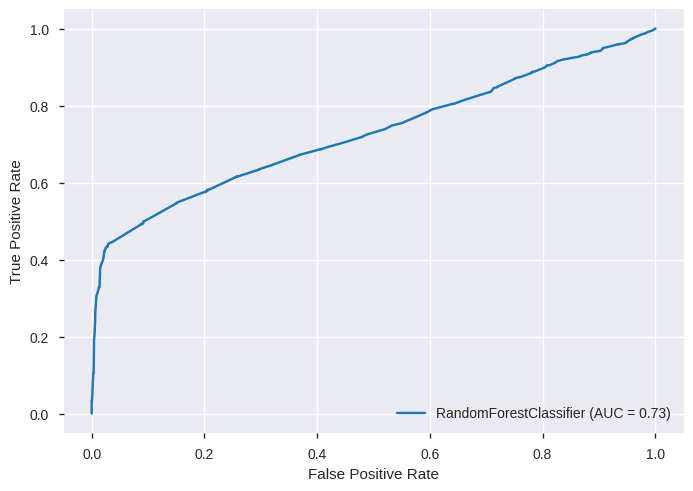

In [ ]:
plot_roc_curve(random_forest, X_test, y_test)

# Random forest con variables de alta correlación

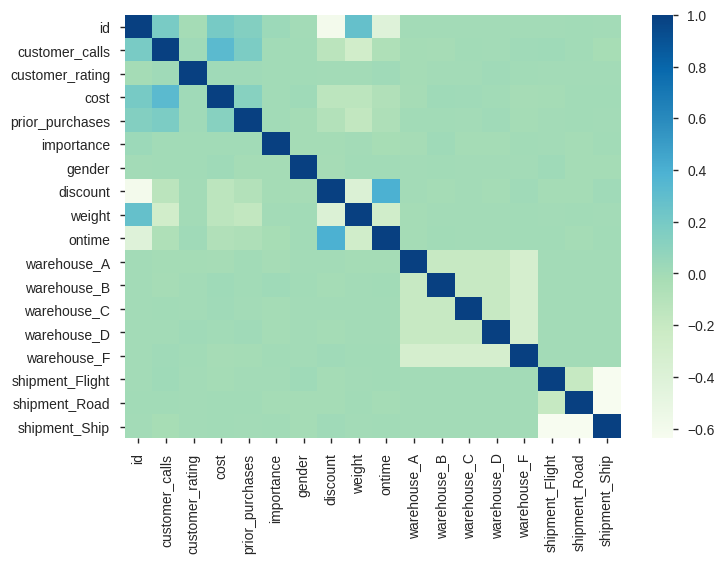

In [ ]:
sns.heatmap(data.corr(),cmap='GnBu')

In [ ]:
# Random Forest Parameters
max_depth = 4
random_state = 0  
n_estimators = 100    # number of trees
min_samples_split = 20 # minimum samples to split a node
min_samples_leaf = 1  # minimum samples to be a leaf

In [ ]:
X = data[['customer_calls',  'cost', 'prior_purchases', 'importance', 'gender', 'weight']]
y = data['ontime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
random_forest = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=n_estimators, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)

In [ ]:
y_predicted = random_forest.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predicted, target_names=["On time", "Delayed"]))

              precision    recall  f1-score   support

     On time       0.57      0.76      0.65      1471
     Delayed       0.79      0.61      0.69      2159

    accuracy                           0.67      3630
   macro avg       0.68      0.69      0.67      3630
weighted avg       0.70      0.67      0.67      3630



In [ ]:
print(confusion_matrix(y_test, y_predicted))

[[1114  357]
 [ 832 1327]]


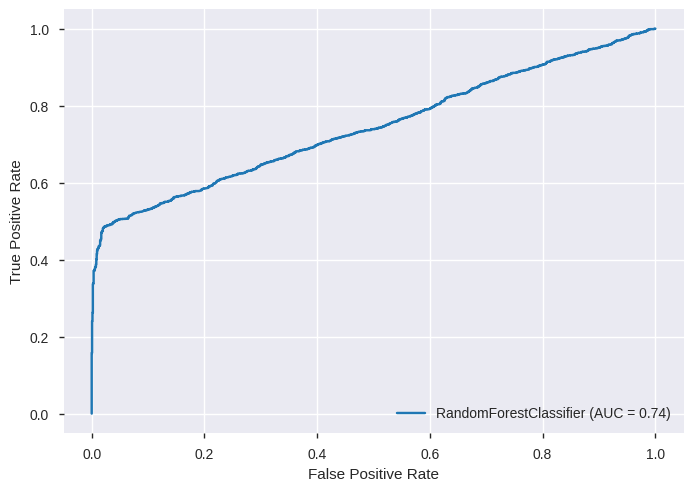

In [ ]:
plot_roc_curve(random_forest, X_test, y_test)

# Logistic Regression

In [ ]:
tolerance = 0.00001

In [ ]:
X = data[['customer_rating', 'discount']]
y = data['ontime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [ ]:
logistic_regression = LogisticRegression(random_state = 0, tol=tolerance).fit(X_train, y_train)
y_predicted = logistic_regression.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predicted, target_names=["On time", "Delayed"]))

              precision    recall  f1-score   support

     On time       0.53      0.48      0.51      1478
     Delayed       0.67      0.71      0.69      2152

    accuracy                           0.62      3630
   macro avg       0.60      0.60      0.60      3630
weighted avg       0.61      0.62      0.61      3630



In [ ]:
print(confusion_matrix(y_test, y_predicted))

[[ 711  767]
 [ 618 1534]]


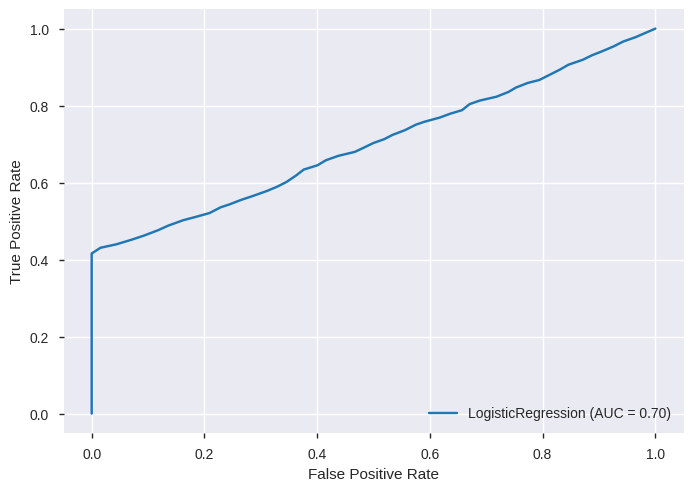

In [ ]:
plot_roc_curve(logistic_regression, X_test, y_test)

# Spectral clustering

In [ ]:
clustering_data = data.sample(100)

X = clustering_data[['customer_calls',  'cost', 'prior_purchases', 'importance', 'gender', 'weight']]
y = clustering_data['ontime']


# Data processing taken from: https://www.geeksforgeeks.org/ml-spectral-clustering/
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_data)
X_normalized = normalize(clustering_data)
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

spectral_clustering = SpectralClustering(n_clusters=2, random_state=0)
clustering_labels = spectral_clustering.fit_predict(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:304: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:304: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: Runtime

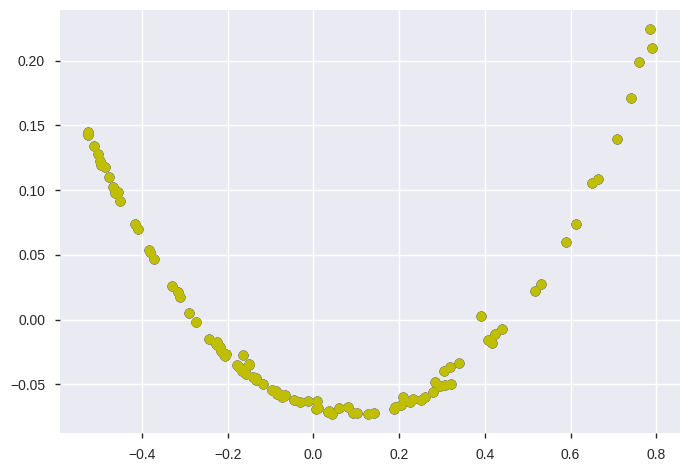

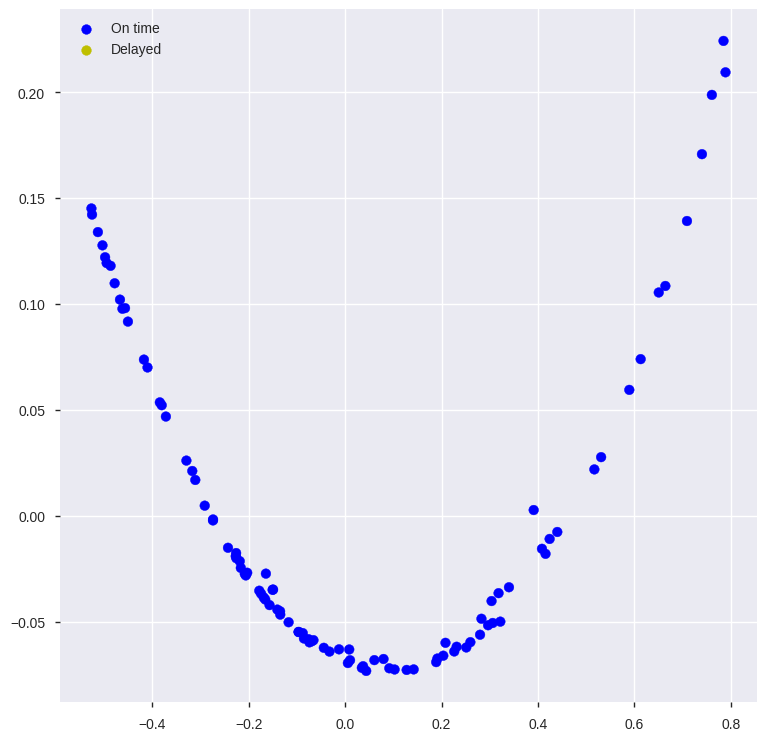

In [ ]:
# Colors
colours = {}
colours[0] = 'b'
colours[1] = 'y'
cvec = [colours[label] for label in clustering_labels]
  
# Plotting clusters
  
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
  
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('On time', 'Delayed'))
plt.show()

# Área de exploración general


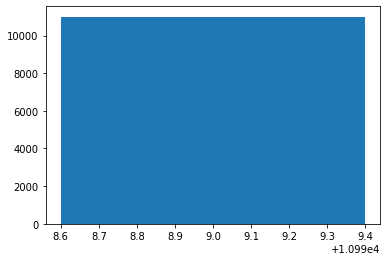

KeyError: ignored

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data = pd.read_csv('./Train.csv')
data.columns = ['id', 'warehouse', 'shipment', 'customer_calls', 'customer_rating','cost', 'prior_purchases', 'importance', 'gender', 'discount', 'weight', 'ontime']
#print(data.head())

label_encoder = LabelEncoder()
hot_encoder = OneHotEncoder()

data['importance'] = label_encoder.fit_transform(data['importance'])  # 1 = low, 2 = medium, 3 = high
data['gender'] = label_encoder.fit_transform(data['gender'])  # 0 = female, 1 = male

plt.bar(data['shipment'].count().mean(), data['ontime'].count().mean())
plt.show()
data['shipment'] = data['shipment'].astype('category')
data['warehouse'] = data['warehouse'].astype('category')


data = pd.get_dummies(data)
count_shipment = data['shipment'].value_counts()
#print(count_shipment)

print(data.head())


# # # region Training
X = data[['customer_calls', 'customer_rating', 'cost', 'prior_purchases', 'importance', 'gender', 'discount', 'weight','warehouse_A', 'warehouse_B', 'warehouse_D', 'warehouse_F', 'shipment_Flight', 'shipment_Road', 'shipment_Ship']]
y = data['ontime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# endregion


# # # region RandomForest

# # # Random Forest Parameters
# # # See the excel for previous results
# # max_depth = 4
# # random_state = 0
# # n_estimators = 10    # number of trees
# # min_samples_split = 10  # minimum samples to split a node
# # min_samples_leaf = 3  # minimum samples to be a leaf

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# # random_forest = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=n_estimators,
# #                                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)
# # y_predicted = random_forest.predict(X_test)
# # print(classification_report(y_test, y_predicted,
# #                             target_names=["Delayed", "On time"]))


# # print(confusion_matrix(y_test, y_predicted))
# # # endregion

# # # Random Forest Parameters
# # max_depth = 8
# # random_state = 0
# # n_estimators = 200    # number of trees
# # min_samples_split = 15  # minimum samples to split a node
# # min_samples_leaf = 7  # minimum samples to be a leaf

# # X = data[['discount', 'shipment_Flight', 'shipment_Road', 'shipment_Ship']]
# # y = data['ontime']
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# # random_forest = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=n_estimators,
# #                                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)
# # y_predicted = random_forest.predict(X_test)

# # print(confusion_matrix(y_test, y_predicted))

# tolerance = 0.000001

# X = data[['customer_calls', 'cost', 'prior_purchases',
#           'discount', 'shipment_Flight', 'shipment_Road', 'shipment_Ship']]
# y = data['ontime']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9)

# logistic_regression = LogisticRegression(
#     random_state=42, tol=tolerance).fit(X_train, y_train)
# y_predicted = logistic_regression.predict(X_test)

# y_corrected = [0 if i == 1 else 1 for i in y_predicted]

print(classification_report(y_test, y_predicted,target_names=["Delayed", "On time"]))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')